# I. CÂU HỎI


## Nội dung

**Theo từng mùa thì loại sản phẩm nào là được khách hàng lựa chọn nhiều nhất?**

## Mục đích


Thông qua các thông tin này, ta có thể biết dự đoán được đâu là sản phẩm có khả năng cao người mua hàng sẽ quan tâm trong tương lai. Từ đó có thể:

- Nâng cao tỉ lệ mua hàng thông qua sự tập trung vào các sản phẩm tương ứng theo mùa

- Nâng cao trải nghiệm mua sắm của khách hàng

- Thấu hiểu nhu cầu của khách hàng

- Tối ưu hoá chi phí sản xuất


___


# II. Tiền xử lý

## Import các thư viện cần thiết

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load file `.csv` đã được qua xử lý

In [5]:
df = pd.read_csv("../data/preproccessed/preprocessed_dataset.csv")
df = df.drop_duplicates()
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


Do mục tiêu của câu hỏi, ta chỉ giữ lại các cột mà ta quan tâm bao gồm:

- `Item Purchased`

- `Season`

- `Purchase Amount (USD)`

In [6]:
shopping_df = df[["Item Purchased", "Season", "Purchase Amount (USD)"]]
shopping_df.head()

,Item Purchased,Season,Purchase Amount (USD)
0,Blouse,Winter,53.0
1,Sweater,Winter,64.0
2,Jeans,Spring,73.0
3,Sandals,Spring,90.0
4,Blouse,Spring,49.0


Xem thử kiểu dữ liệu của các cột

In [7]:
shopping_df.dtypes

Item Purchased            object
Season                    object
Purchase Amount (USD)    float64
dtype: object

Kiểu dữ liệu của các cột là hợp lý rồi nên ta không cần phải xử lý gì thêm

----

# III. Phân tích và trả lời

## Vẽ barchart biểu diễn 5 sản phẩm được mua nhiều nhất theo từng `Season`

Lấy ra các mùa theo thứ tự để tiện quan sát

In [8]:
seasons = ["Spring", "Summer", "Fall", "Winter"]

Visualize các sản phẩm bán chạy nhất theo mùa

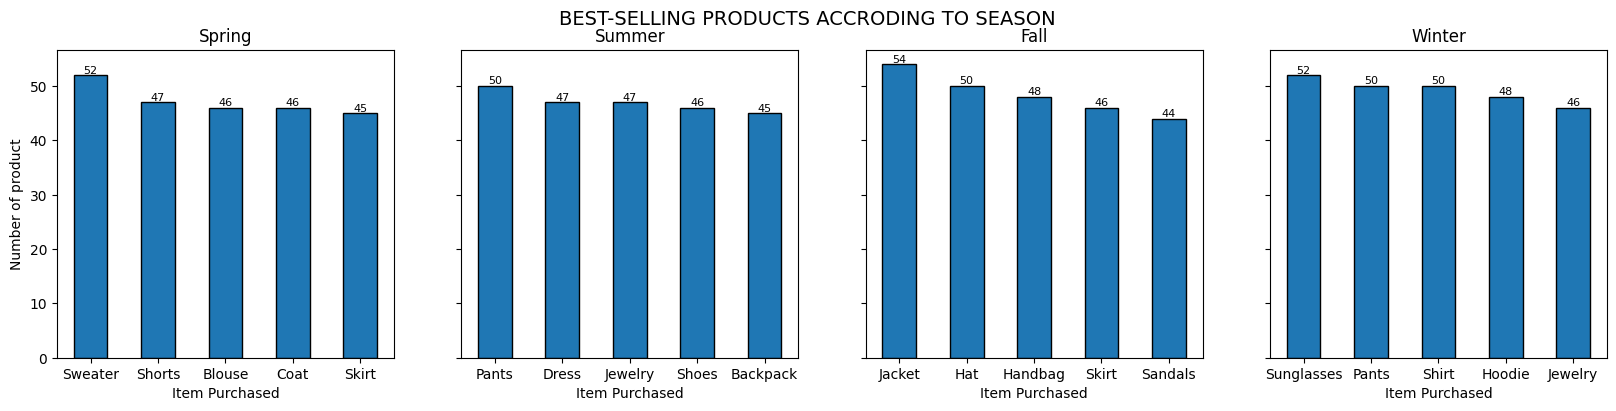

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

fig.suptitle("BEST-SELLING PRODUCTS ACCRODING TO SEASON", fontsize = 14)
for i, season in enumerate(seasons):

    data = shopping_df[shopping_df["Season"] == season]["Item Purchased"].value_counts().sort_values(ascending=False)
    top_5 = data.head()
    barplot = top_5.plot.bar(ax=axes[i], edgecolor="black")
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black')

    axes[i].set_ylabel("Number of product")
    axes[i].set_title(season)
    axes[i].tick_params(axis='x', labelrotation=0)

**Nhận xét**

- Nhu cầu mua sắm sản phẩm của khách hàng trong mỗi mùa là khác nhau. Tại mỗi mùa cụ thể, khách hàng sẽ có những yêu cầu nhất định ở sản phẩm. 

- Do đó người bán hàng phải tập trung vào việc nâng cao chất lượng, mẫu mã... của các sản phẩm này để thu hút được nhiều khách hàng nhất.

- Chẳng hạn như `Fall` thì `Jacket` được mua nhiều nhất, do đặc tính của mùa thu thời tiết dần trở nên mát mẻ cho nên `Jacket` sẽ được mua nhiều nhất.

- Thông qua dữ liệu, ta có thể biết được đâu là các sản phẩm sẽ được ưa chuộng theo mùa. Từ đó sẽ có những chiến lược phù hợp để nâng cao doanh số bán hàng, tối ưu chi phí sản xuất.

- Tránh sản xuất các mặt hàng ít được ưa chuộng để đảm bảo việc kinh doanh

## Thông tin bổ sung

### Giá trung bình của sản phẩm

Bên cạnh chỉ ra các sản phẩm được ưa chuộng nhất dựa theo mùa, ta có thể tìm hiểu liệu rằng khách hàng sẵn sàng chi trả bao nhiêu tiền cho một sản phẩm.

**Mục tiêu**

- Lựa chọn phân khúc giá thành phù hợp cho việc sản xuất

- Tối ưu hoá chi phí sản xuất để tiếp cận được nhiều khách hàng nhất

Tạo DataFrame chứa `mean` của cột `Purchase Amount (USD)` theo từng sản phẩm

In [10]:
avg_price = shopping_df.groupby("Item Purchased")["Purchase Amount (USD)"].mean().to_frame().reset_index()
avg_price.head()

,Item Purchased,Purchase Amount (USD)
0,Backpack,59.943262
1,Belt,59.844720
2,Blouse,61.105882
3,Boots,62.625000
4,Coat,57.637500


Visualize dữ liệu

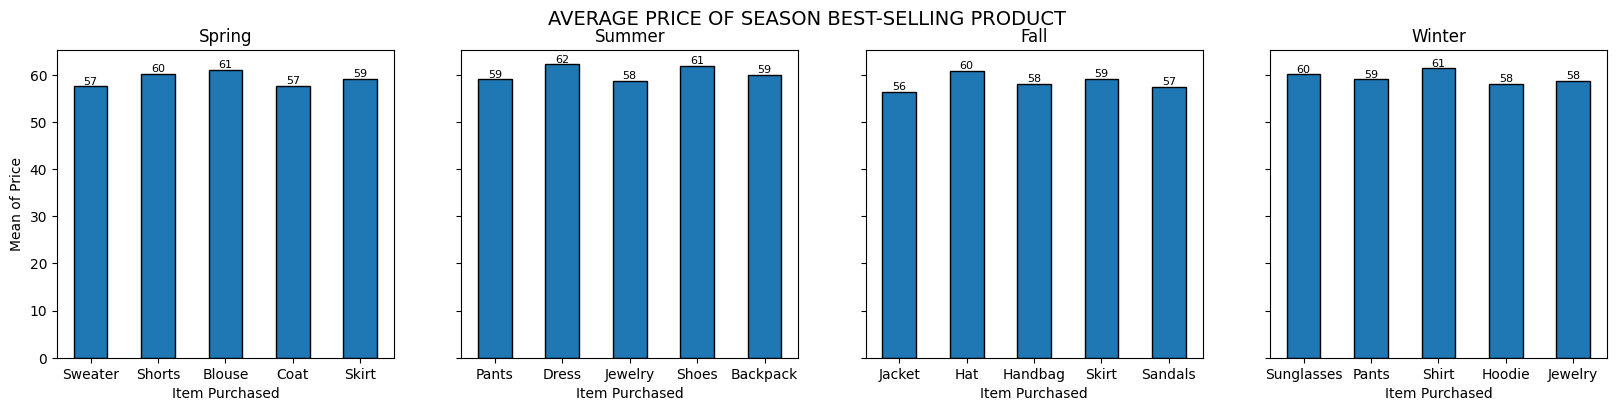

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
seasons = ["Spring", "Summer", "Fall", "Winter"]

fig.suptitle("AVERAGE PRICE OF SEASON BEST-SELLING PRODUCT", fontsize = 14)
for i, season in enumerate(seasons):

    data = shopping_df[shopping_df["Season"] == season]["Item Purchased"].value_counts().sort_values(ascending=False)
    top_5_product = data.head().to_frame().reset_index()

    # Merge to with `avg_price`
    item_price_df = top_5_product.merge(avg_price, how="inner", on = "Item Purchased")
    
    # Plot mean price
    barplot = item_price_df.plot.bar(x="Item Purchased", y="Purchase Amount (USD)", ax= axes[i], edgecolor = "black")

    # add value on each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black')

    # add information for display
    axes[i].set_ylabel("Mean of Price")
    axes[i].set_title(season)
    axes[i].tick_params(axis='x', labelrotation=0)
    axes[i].legend().remove()

**Nhận xét**

Thông qua hình ảnh trực quan hoá, ta có thể biết được mức giá trung bình mà khách hàng sẵn sàng chi trả cho một sản phẩm.

Việc nắm được mức giá trung bình giúp người bán hàng có thể chủ động phân bổ chi phí sản xuất hợp lý. Từ đó, tối ưu được chi phí sản xuất và đảm bảo việc kinh doanh được thuận lợi



### Mùa mua sắm

Bên cạnh đó, ta cũng có thể tìm hiểu thêm về sự phân bổ của khách hàng của các mùa như thế nào.


**Mục đích**

Tối ưu trong việc phân bổ chi phí sản xuất, nguồn lực vào các mùa mua sắm cao điểm

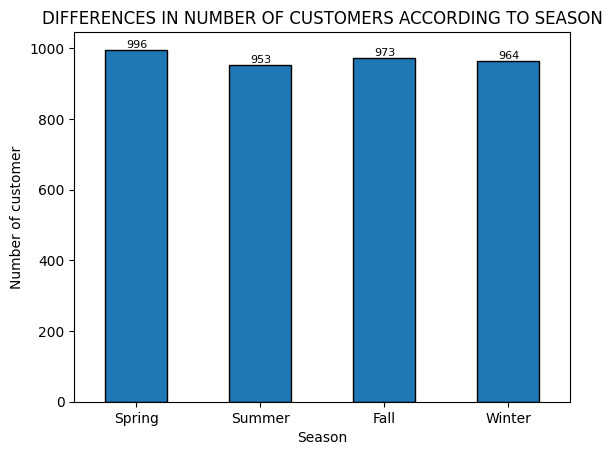

In [12]:
data = shopping_df["Season"].value_counts()[["Spring", "Summer", "Fall", "Winter"]]

barplot = data.plot.bar(edgecolor = "black")
plt.tick_params(axis="x", rotation=0)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black')

plt.ylabel("Number of customer")
plt.title('DIFFERENCES IN NUMBER OF CUSTOMERS ACCORDING TO SEASON');

**Nhận xét**

- Sự chênh lệch về số lượng khách hàng giữa các mùa là không đáng kể.

- Việc mua sắm tập trung chủ yếu từ `Fall` đến `Spring`, trong đó `Spring` là mùa cao điểm nhất


